# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [41]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [43]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [44]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars 

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

In [45]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


## Part 1: What is this dataset?

In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) 

...and some discrete variables (like `vs`, `am`, `gear`, and `carb`). 

First, Google around to figure out what these variables mean. Learn a bit of background about the `mtcars` dataset. Answer the following questions.

* What is this dataset? 
* What is each row?
* What is the "universe of data" represented here?
* Where and when was it collected? 
* By whom? 
* For what purpose? 

Write the answers in the cell below before moving on.

<hr>


In [46]:
# 👉 your answers here

## Part 2: Practice R 

In each of the cells below, the comment will tell you what to do. 

* Use the pipe `%>%` syntax
* Try not to use ChatGPT

### `filter()`

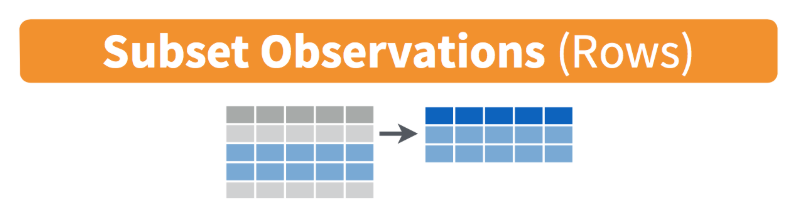

In [47]:
%%R 

# 👉 Filter to only Mazdas

mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

In [48]:
%%R 

# 👉 Filter to only automatic cars

mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

In [49]:
%%R 

# 👉 Filter to only cars with a v shaped engine

mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

### `select()`

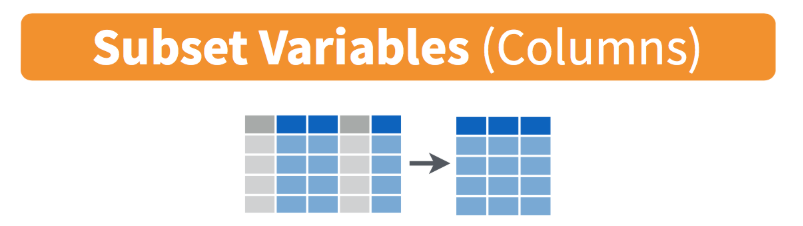

In [50]:
%%R 

# 👉 select only the name, fuel efficiency, weight, and speed related columns

mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb


   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 more rows
# ℹ Use `print(n = ...)` to see more rows


In [51]:
%%R 

# 👉 select only the discrete variables

mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

In [52]:
%%R 

# 👉 select only the continuous variables

mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

### `mutate()`

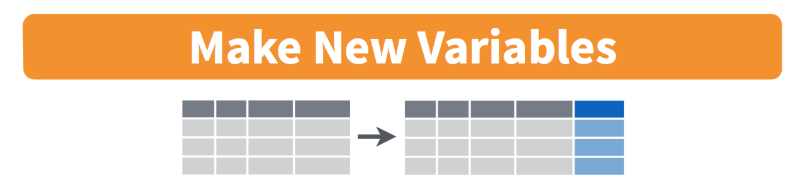

In [53]:
%%R 

# 👉 qsec is a car's quarter mile time, make two new columns:
#       - one for the one-mile time (call it `mile_time`)
#       - one for the how many gallons of gas burned driving down a highway at 60mph for an hour (call it `gallons_per_hour`)

mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

### `arrange()`

In [54]:
%%R 

# 👉 sort the cars from slowest to fastest
mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

In [55]:
%%R 

# 👉 sort the cars from most to least fuel efficient
mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

### `separate()`

This is one we haven't learned, look up how it works!

In [56]:
%%R 

# 👉 separate the name column into two columns: `make` and `model`
mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

### `pivot_longer()`

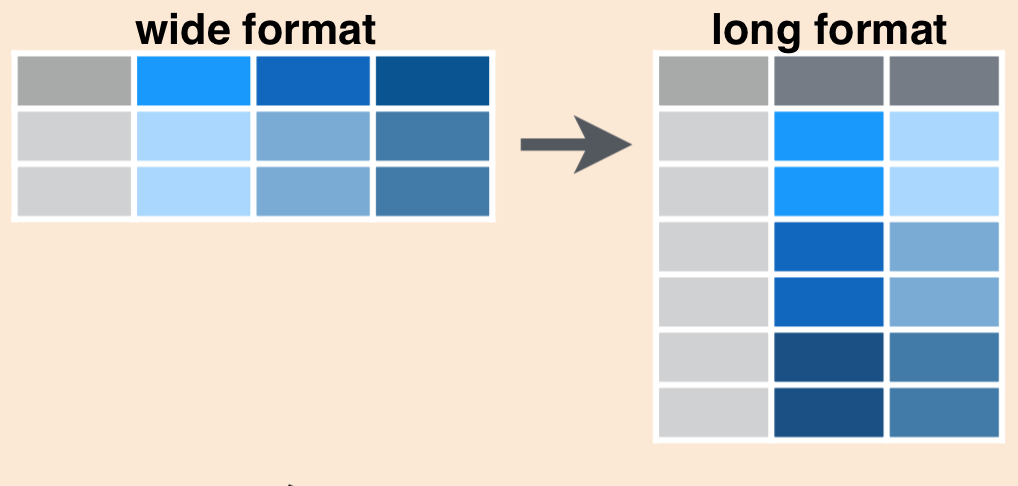



In [57]:
%%R 

# 👉 The dataframe is currently in "wide" format. Use `pivot_longer()` to make it "long" instead.
mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

### 👉 Putting it all together

In [58]:
%%R 

# 👉 separate make and model, then filter down to cars made by Merc, and select only the continuous variables

mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

In [59]:
%%R 

# 👉 separate make and model, 

mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m

### bonus: for this one you'll need `separate` as well as `group_by`, `summarize` and `arrange`

In [60]:
%%R 

# 👉 get the average fuel efficiency for each car brand and then sort by the brnad that is most to least efficient

mtcars

# A tibble: 32 × 12
   name          mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
   <chr>       <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
 1 Mazda RX4    21       6  160    110  3.9   2.62  16.5     0     1     4     4
 2 Mazda RX4 …  21       6  160    110  3.9   2.88  17.0     0     1     4     4
 3 Datsun 710   22.8     4  108     93  3.85  2.32  18.6     1     1     4     1
 4 Hornet 4 D…  21.4     6  258    110  3.08  3.22  19.4     1     0     3     1
 5 Hornet Spo…  18.7     8  360    175  3.15  3.44  17.0     0     0     3     2
 6 Valiant      18.1     6  225    105  2.76  3.46  20.2     1     0     3     1
 7 Duster 360   14.3     8  360    245  3.21  3.57  15.8     0     0     3     4
 8 Merc 240D    24.4     4  147.    62  3.69  3.19  20       1     0     4     2
 9 Merc 230     22.8     4  141.    95  3.92  3.15  22.9     1     0     4     2
10 Merc 280     19.2     6  168.   123  3.92  3.44  18.3     1     0     4     4
# ℹ 22 m